**=====================================================================**


# Capstone 2

**=====================================================================**

## Healthcare  - PGP

### Description
- NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
- The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.

#### Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

#### Variables
- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration in an oral glucose tolerance test
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skinfold thickness (mm)
- **Insulin:** Two hour serum insulin
- **BMI:** Body Mass Index
- **DiabetesPedigreeFunction:** Diabetes pedigree function
- **Age:** Age in years
- **Outcome:** Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### Project Task: Week 1
#### Data Exploration 1:
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, **<span style="color:magenta"><u>a value of zero does not make sense and thus indicates missing value:<u/><span>**
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

#### Data Exploration 2:
1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3.  correlation analysis. Visually explore it using a heat map.

### Project Task: Week 2
#### Data Modeling:
1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model.
3. Compare various models with the results from KNN algorithm.
4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. 
5. Please be descriptive to explain what values of these parameter you have used.

#### Data Reporting:
1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
- Pie chart to describe the diabetic or non-diabetic population
- Scatter charts between relevant variables to analyze the relationships
- Histogram or frequency charts to analyze the distribution of the data
- Heatmap of correlation analysis among the relevant variables
- Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.


**=====================================================================**

## The  author of this Notebook is Tyrone Oldham

**=====================================================================**


# <u>WEEK 1: Task Followed<u/>

## Importing Libraries & Dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <span style="color:magenta">Significace - In this context, null values as of now will not show because the zero values have not yet been treated as null values<span>

## Data Exploration 1:

## 1. Perform Descriptive analysis.

### 1.1 Covert zero values into missing values
**<span style="color:magenta">According to problem statement, a value of zero in the following columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI indicates missing value:<span>**

#### •	FIRST - covert zero values into missing values

In [6]:
# Put columns with zero values in a list
cols_with_null_as_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Convert zero values to NaN
df[cols_with_null_as_zero] = df[cols_with_null_as_zero].replace(0, np.NaN)

#### •	Use .info to see results of non-null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


• Use .isnull().sum() to get null count

In [8]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<span style="color:magenta">Now missing values for Gucose is 5', 'BloodPressure 35', 'SkinThickness 227', 'Insulin 374', and 'BMI 11' we will treat these as missing values later.<span>**

### 1.2 Understand the variables and their corresponding values.

In [9]:
# Understanding value count in Pregnancies field
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<AxesSubplot:title={'center':'Number of times Pregnant'}, xlabel='Pregnancies'>

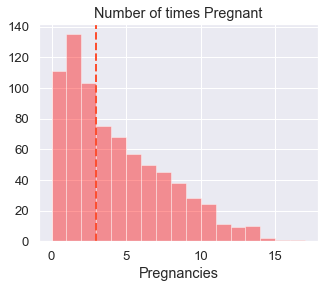

In [10]:
median_value = df['Pregnancies'].median()
title = 'Number of times Pregnant'
color = '#fc4f30'
label = 'median'

plt.figure(figsize = (5, 4))
plt.axvline(median_value, color=color, label=label, lw=2, ls='--')
plt.title(title)
sns.distplot(df['Pregnancies'], kde = False, color = 'red', bins=17)

**<span style="color:magenta">The maximun number of pregnancies is 17. Indicating 17 different groups of pregmamt women.  The median number of pregnancies is around 3, where as the mean number is 3.8.<span>**

#### •	Use .describe to understand variables and values

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Visually explore  variables using histograms.

### 2.1. Visually explore variables with histograms <u>BEFORE</u> treating missing values.

In [12]:
#Put columns with missing values in a list
miss_val_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

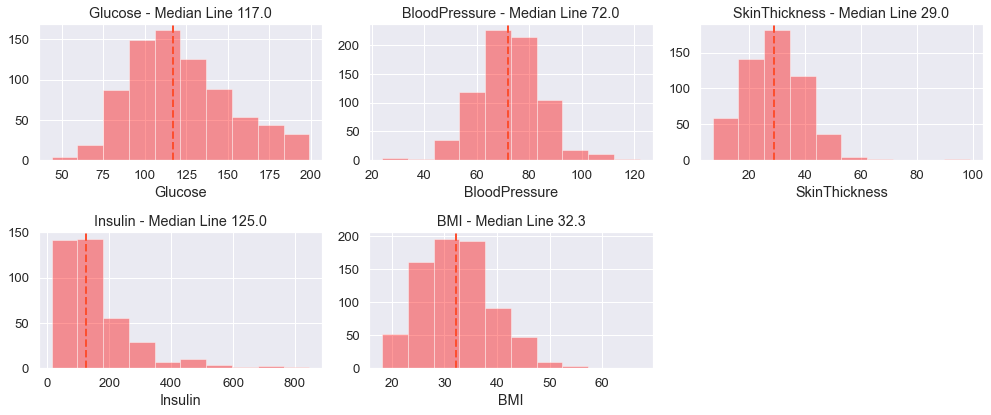

In [13]:
#Run for loop to plot histogram for each column
plt.figure(figsize=(14,6))
color = '#fc4f30'
label = 'median'
for col, features in enumerate(miss_val_cols):
    plt.subplot(2,3,col+1)
    median = features + ' - Median Line ' + str(df[features].median())
    median_value = df[features].median()

    #label = 'median'
    plt.axvline(median_value, color=color, label=label, lw=2, ls='--')
    plt.title(median)
    sns.distplot(df[features], kde = False, color = 'red', bins=10)
    plt.tight_layout()
    

#### Average Significance - RED dash-line in above histograms represents the median
- **Glucose** – With a median of 117.0, the majority, about 150 patients in this dataset have a glucose level between 100 to 120
- **Blood Pressure** – With a median of 72.0, the majority, over 200 patients in this dataset have a Blood Pressure level between 65 to 72
- **Skin Thickness** – With a median of 29.0, the majority, about 175 patients in this dataset have a Skin Thickness level between 25 to 35
- **Insulin** – Highly skewed right, with a median of 125.0, the majority, about 140 patients in this dataset have a Insulin level less than 190
- **BMI** – With a median of 32.3, the majority, about 200 patients in this dataset have a BMI level between 30 to 35

#### A patient outside these averages may have a greater risk of Diabetes

### 2.2. Treating missing values accordingly.

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

From above histograms, Insulin is a highly skewed distribution. The remaining 4 plots have relatively balanced data distributions. Thus we will treat missing values in the 5 COLUMNS below:
- **Glucose** - *replace missing values with mean of values.*
- **BloodPressure** - *replace missing values with mean of values.*
- **SkinThickness** - *replace missing values with mean of values.*
- **Insulin** - *replace missing values with <u>median</u> of values.*
- **BMI** - *replace missing values with mean of values.*


#### •	Drop insulin column since so many values are missing

In [16]:
# Since so many values are missing here I will drop the insulin colunm
df = df.drop('Insulin', axis=1)

#### •	Replace remaining 4 columnas with thier corresponding mean

In [17]:
#Create list
cols_mean_for_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

#Replace with mean
df[cols_mean_for_null] = df[cols_mean_for_null].fillna(df[cols_mean_for_null].mean())

#### •	Review null count

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,43.1,2.288,33,1


In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<span style="color:magenta">Now there aare zero missing values in the dataset<span>**

#### •	Some summary information

In [20]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,35.384757,0.550500,37.067164


In [21]:
df.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  110.710121  107.5     70.935397   72.0   
1          4.865672    4.0  142.165573  140.0     75.147324   74.0   

        SkinThickness                  BMI        DiabetesPedigreeFunction  \
                 mean    median       mean median                     mean   
Outcome                                                                      
0           27.768651  29.15342  30.888434  30.40                 0.429734   
1           31.736944  29.15342  35.384757  34.25                 0.550500   

                      Age         
        median       mean median  
Outcome                           
0        0.336  31.190000   27.0  
1        0.449  37.067164   36.0

**<span style="color:magenta">For people with daibetes or outcome 1 the mean/median numbers are  higher across the board.<span>**

### 2.3. Visually explore variables with histograms AFTER treating missing values.

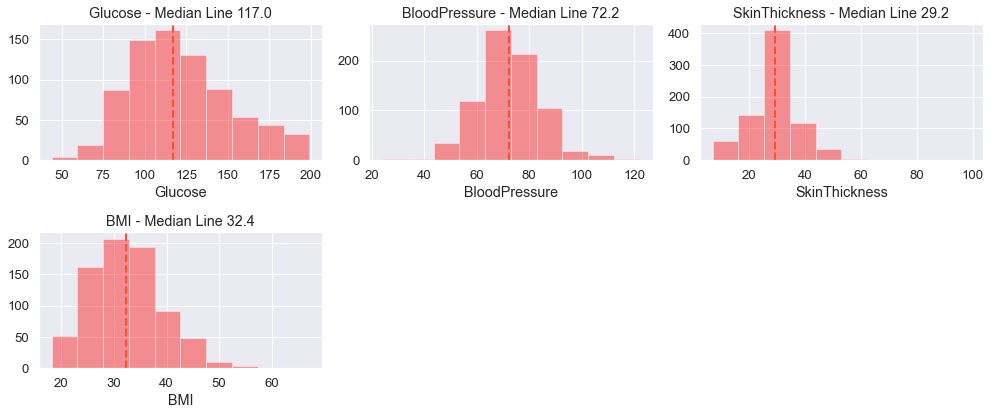

In [22]:
miss_val_cols2 = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

plt.figure(figsize=(14,6))
color = '#fc4f30'
label = 'median'
for col, features in enumerate(miss_val_cols2):
    r = round(df[features].median(), 1)
    plt.subplot(2,3,col+1)
    median = features + ' - Median Line ' + str(r)
    median_value = df[features].median()

    #label = 'median'
    plt.axvline(median_value, color=color, label=label, lw=2, ls='--')
    plt.title(median)
    sns.distplot(df[features], kde = False, color = 'red', bins=10)
    plt.tight_layout()
    

**<span style="color:magenta">There is only a few tenths difference AFTER dorping missing values compared to before. Except with insulin which is totally drop<span>**

## 3. Create a count plot describing data types & count of variables:
#### There are integer and float data type variables in this dataset

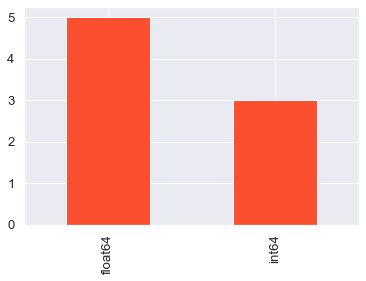

In [23]:
df.dtypes.value_counts().plot(kind='bar', color = '#fc4f30');

#### <span style="color:magenta">Significance - There are 6 Floats and 3 Integer types in this dataset.<span>

## Data Exploration 2:

## 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

### 1.1. Check the balance of the outcome column

<AxesSubplot:>

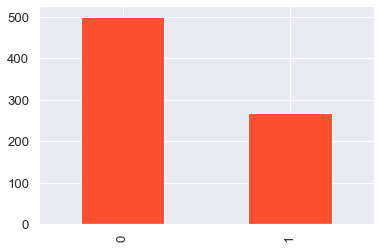

In [24]:
#Plot outcome value count
df['Outcome'].value_counts().plot(kind='bar', color = '#fc4f30')

In [25]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 1.2. Describe findings and plan future course of action.

### <span style="color:magenta">Significance - Outcome has unblanced amounts of '0' and '1'.<span>
- There are 500 zero's compared to 268 one's
- This unbalance can display inaccurancies when **Modeling**
- To deal with unblances I will use SMOTE (Synthetic Minority Oversampling Technique)

### 1.3. Plan future course of action.

#### Use SMOTE (Synthetic Minority Oversampling Technique)
Since classes in **Outcome** is little skewed so we will generate new samples using **SMOTE (Synthetic Minority Oversampling Technique)** for the class '1' which is under-represented in our data. We will use SMOTE out of many other techniques available since
- It generates new samples by interpolation.
- It doesn't duplicate data.

####  •	Before using SMOTE divide DataFrame into features & traget

In [26]:
#Set values & traget
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']
print(df_X.shape, df_y.shape)

(768, 7) (768,)


####  •	Import & Use SMOTE

In [27]:
#Import SMOTE
from imblearn.over_sampling import SMOTE

In [28]:
#Use SMOTE
df_X_resampled, df_y_resampled = SMOTE(random_state=108).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 7) (1000,)


####  •	Plot  & Display New Results

1    500
0    500
Name: Outcome, dtype: int64

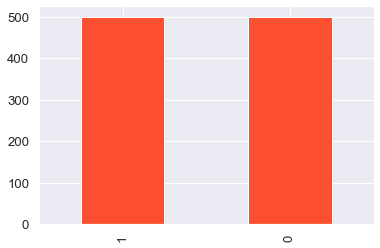

In [29]:
df_y_resampled.value_counts().plot(kind='bar', color = '#fc4f30')
df_y_resampled.value_counts()

#### <span style="color:magenta">Significance - Outcome is now blanced with equal amounts of '0' and '1'.<span>
This makes **Modeling** more effiecent

## 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings:



####  •	Combine  df_X_resampled & df_y_resampled to a DataFrame

In [30]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...
995,6,165.811276,73.124510,29.153420,38.437745,0.836855,33,1
996,0,138.913540,69.022720,27.713033,39.177649,0.703702,24,1
997,8,134.416290,76.838354,33.733547,48.739369,0.379539,43,1
998,0,105.571347,83.238205,29.153420,27.728596,0.649204,60,1


####  •	Create scattered plot to compare  Outcome of Pregnancies & Glucose Results

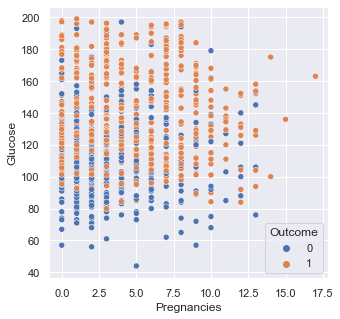

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x="Pregnancies", y="Glucose", data=df_resampled, hue="Outcome");

####  •	Create pairplot plots to understand relationship between variables

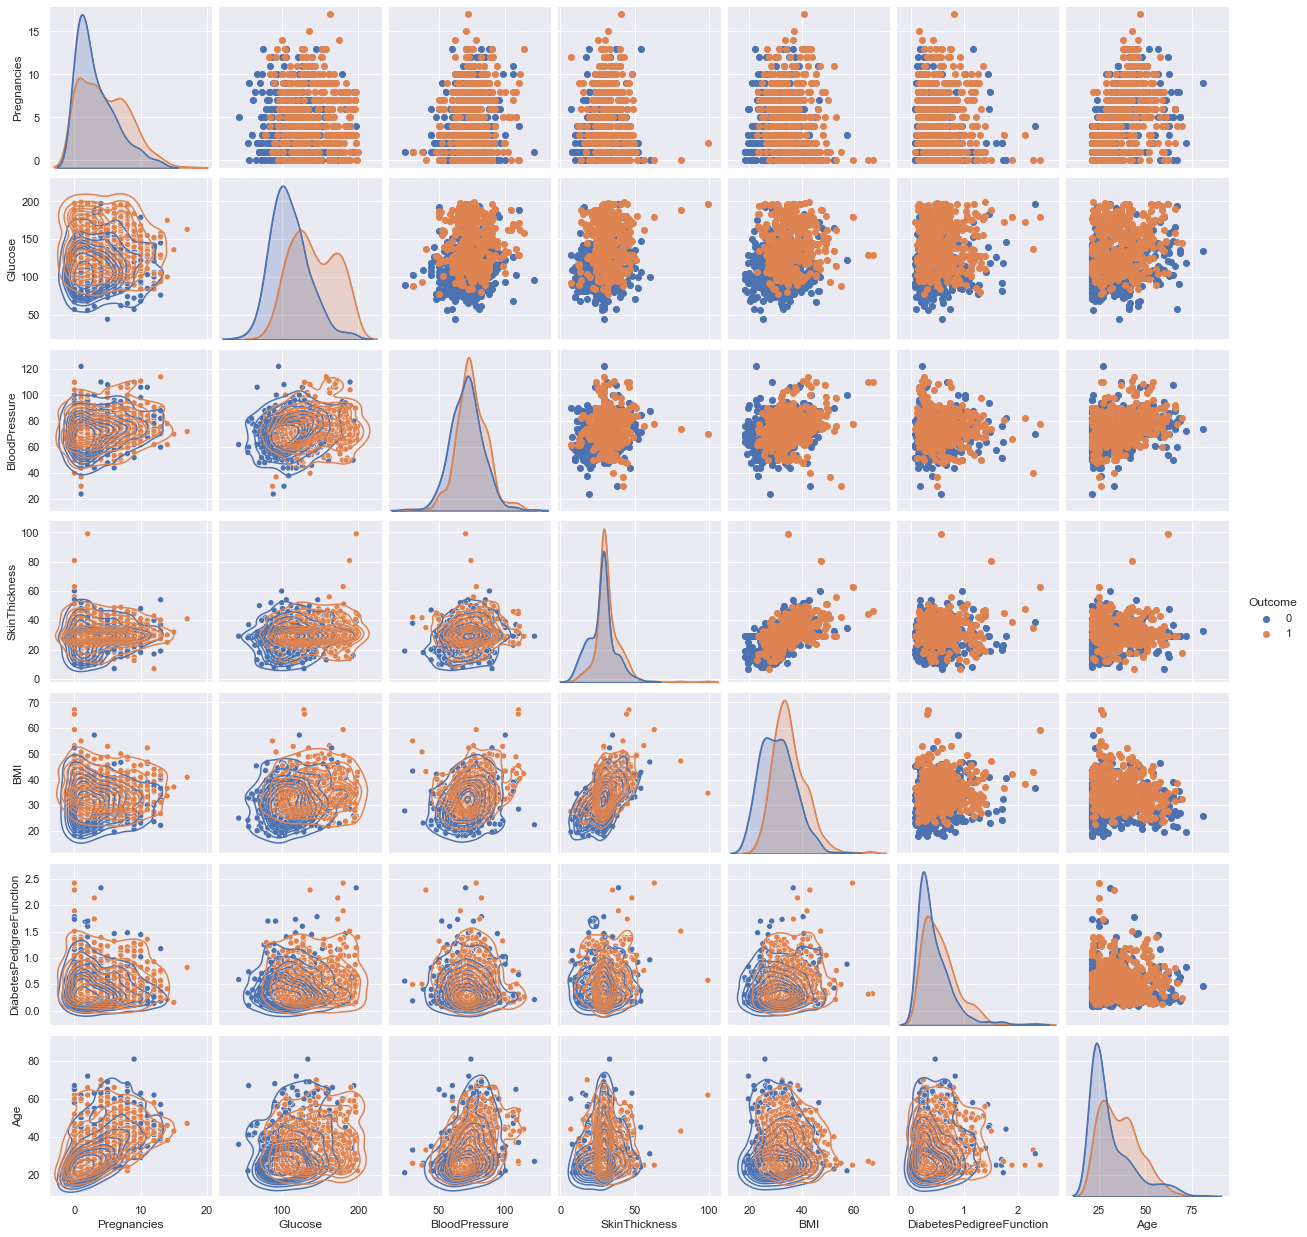

In [32]:
sns.set()
g= sns.pairplot(df_resampled, hue='Outcome')
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
plt.show()

#### <span style="color:magenta">Interesting observations from above scatter plot of pairs of features:<span>

- **Glucose** alone is impressively good to distinguish between the Outcome classes.
- **Age** alone is also able to distinguish between classes to some extent.
- It seems none of pairs in the dataset is able to clealry distinguish between the Outcome classes.
- We need to use combination of features to build model for prediction of classes in Outcome.


## 3. Perform correlation analysis. Visually explore it using a heatmap.

### 3.1.a Perform correlation analysis.

In [33]:
df_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.079722,0.193040,0.057319,0.002415,-0.037024,0.542777
Glucose,0.079722,1.000000,0.215034,0.198991,0.244060,0.156547,0.228587
BloodPressure,0.193040,0.215034,1.000000,0.180780,0.288231,0.003109,0.332516
SkinThickness,0.057319,0.198991,0.180780,1.000000,0.547189,0.127553,0.102357
BMI,0.002415,0.244060,0.288231,0.547189,1.000000,0.166342,0.013175
DiabetesPedigreeFunction,-0.037024,0.156547,0.003109,0.127553,0.166342,1.000000,0.013798
Age,0.542777,0.228587,0.332516,0.102357,0.013175,0.013798,1.000000


### 3.1.b Visually explore correlation analysis using a heat map:

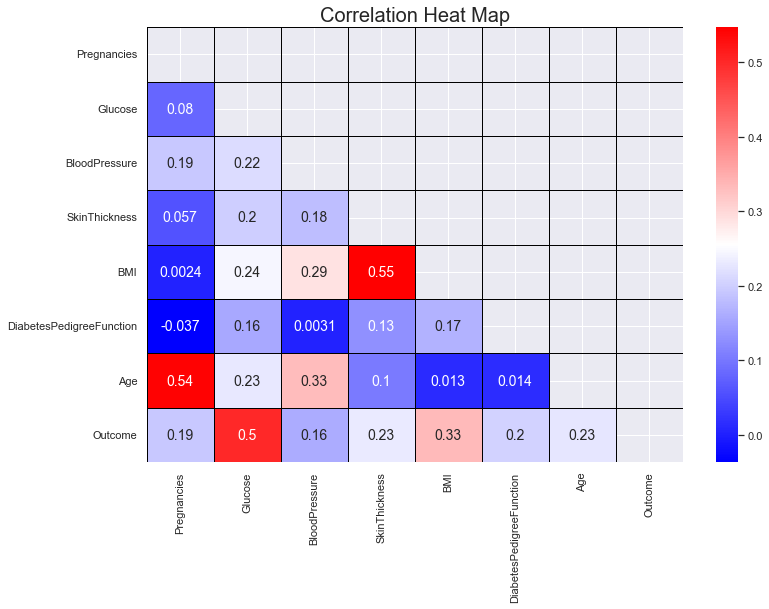

In [34]:
#Create a Mask to hide half of heatmap for readablity
corr = df_resampled.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    df_resampled.corr(), 
    cmap='bwr', 
    annot=True, 
    mask = mask, 
    linewidths=1, 
    linecolor='black', 
    annot_kws={"fontsize":14}).set_title('Correlation Heat Map', 
    fontsize = 20)

plt.grid('on', )
plt.show()



#### <span style="color:magenta">It appears from correlation matrix & heatmap that there are significant correlation between some pairs:<span>
<span style="color:magenta">**- Age-Pregnancies**<span>
    
<span style="color:magenta">**- BMI-SkinThickness**<span>

### 3.2.a Perform Co-Variance analysis.

In [35]:
df_resampled.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.391366,8.454231,7.752623,1.652730,0.055149,-0.040704,20.804329,0.323824
Glucose,8.454231,987.224507,80.395043,53.414492,51.875763,1.602192,81.564948,7.857152
BloodPressure,7.752623,80.395043,141.588684,18.377318,23.201420,0.012049,44.933556,0.960672
SkinThickness,1.652730,53.414492,18.377318,72.984942,31.623742,0.354950,9.930705,0.985884
BMI,0.055149,51.875763,23.201420,31.623742,45.763441,0.366541,1.012134,1.128073
DiabetesPedigreeFunction,-0.040704,1.602192,0.012049,0.354950,0.366541,0.106102,0.051040,0.033372
Age,20.804329,81.564948,44.933556,9.930705,1.012134,0.051040,128.969945,1.283784
Outcome,0.323824,7.857152,0.960672,0.985884,1.128073,0.033372,1.283784,0.250250


### 3.2.b Visually explore Co-Variance analysis using a heat map:

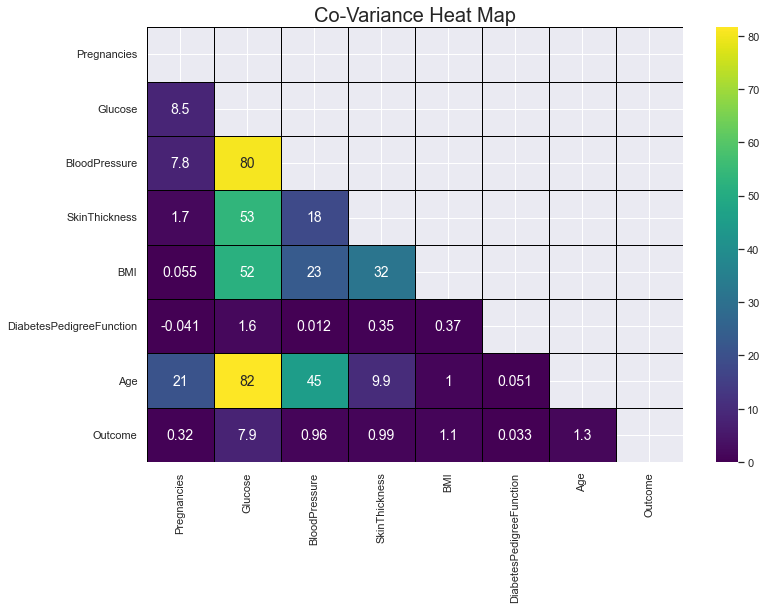

In [36]:
#Create a Mask to hide half of heatmap for readablity
cov = df_resampled.cov()
mask = np.zeros_like(cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    df_resampled.cov(), 
    cmap='viridis', 
    annot=True, 
    mask = mask, 
    linewidths=1, 
    linecolor='black', 
    annot_kws={"fontsize":14}).set_title('Co-Variance Heat Map', 
    fontsize = 20)

plt.grid('on', )
plt.show()



### 3.3 Visually explore using boxplot

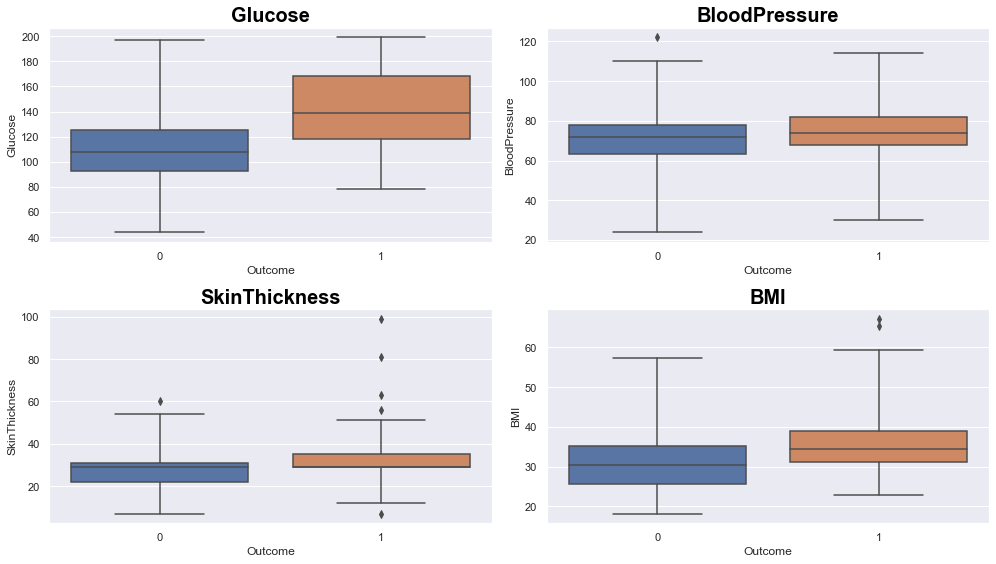

In [37]:
miss_val_cols3 = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

#Run for loop to plot histogram for each column
plt.figure(figsize=(14,8))
for col, features in enumerate(miss_val_cols3):
    plt.subplot(2,2,col+1)
    plt.title(features, {'size':20, 'color':'black', 'weight':'bold'})
    sns.boxplot(x='Outcome', y=features, data=df_resampled, whis=3.0) 
    plt.tight_layout()
    

**<span style="color:magenta">The various boxplots shows, for people with daibetes or outcome 1 the meann numbers are  higher across the board.<span>**

# <u>WEEK 2: Task Followed<u/>

## Data Modeling:

## 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process:



### <span style="color:red">NOTE: The above features are created just to pratice with Logistic Regression but we will use a package called PyCaret for futher modeling and analysis.</span>

#### Creating 3 Probabilistic Features.

Based on the previous Correlatilon plot a simple approach is to use the top correlated variables and investigate them further. In oue case they are 'Glucose', 'BMI', and 'Age'.

- We will not use 'Pregnancies' because we will not pay attention to gender/
- We will niot use 'DiabetesPedigreeFunction' because we do not expect the patient to knoiw this value.

In [38]:
# Get these these columns only
data = df_resampled[['Glucose', 'BMI', 'Age', 'Outcome']]


In [39]:
data.shape

(1000, 4)

### Predicting Diabetes with Logistic Regression

In [40]:
data.head(2)

,Glucose,BMI,Age,Outcome
0,148.0,33.6,50,1
1,85.0,26.6,31,0


#### • Divide dataset into X indepemdent and y dependent

In [ ]:
#Set values & traget
p_X = data.drop('Outcome', axis=1)
p_y = data['Outcome']

#### •	Import - train_test_split, score models and confusion_matrix

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### • Split into Train and Test

In [43]:
# Split data into train, test
X_train, X_test, y_train, y_test = train_test_split(p_X, p_y, test_size=0.2, random_state = 3)

#### •	Import Model

In [44]:
# Import statsmodel
from sklearn.linear_model import LogisticRegression

In [45]:
# fit model on training data
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

#### •	Print Accuracy

In [46]:
accuracy = model2.score(X_test, y_test)
print("Accuracy = ", round(accuracy*100, 1), "%")

Accuracy =  78.0 %


#### •	Interpreting the Model
**To get a better sense of what is goig on inside the logistic regression model, we can visualize how our model uses the different features and which feature have greater effect on out come.**

Text(0.5, 0, 'Importance')

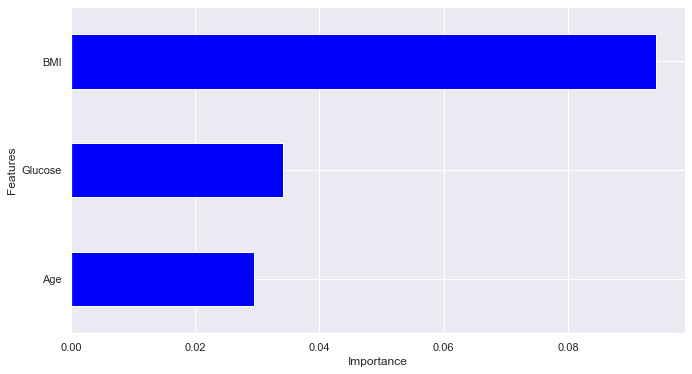

In [48]:
coeff = list(model2.coef_[0])
labels = data.columns[:-1]
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh', figsize=(11,6), color=features['positive'].map(
            {True:'blue', False:'red'}))
plt.xlabel('Importance')



#### <span style="color:magenta">Significance - The nodel show that BMI is the most sigmificant feature when detecting diabetes.<span>


In [49]:
features

,importance,positive
Features,,
Age,0.029384,True
Glucose,0.034162,True
BMI,0.094145,True


### Conclusions from the above figure:
- The nodel show that 'BMI' is the most sigmificant feature when detecting diabetes.
- The second highest  is 'Age"/
- The third place is 'Glucose'.
- The Correlation Matrix earlier ad above tells use the 'glucose' is more related than 'BMI' to the outcome. This can happen for several reasopns. Some other variales are captured y the model

### Predict Outcome of a Random Person
- Having a certain 'Glucose' level, 'BMI', and 'Age'

In [50]:
# Our test person could e an individaual who just walked in with the following parameters.
test_person = [[110, 35, 52]]

In [51]:
model2.predict(test_person)

array([1], dtype=int64)

In [52]:
model2.predict_proba(test_person)

array([[0.45671438, 0.54328562]])

#### <span style="color:magenta">Significance - This model suggest that given the above vaules there is a slightly higher chance of this random person having diabetes A 54% chance.<span>


### <span style="color:red">NOTE: The above features are created just to pratice with Logistic Regression but we will use a package called PyCaret for futher modeling and analysis.</span>

### The Plan for Using PyCaret

This is a classification problem. I will use **PyCaret** which will simplify the work of applying different classifiers on a healthcare dataset. PyCaret will allow the selection of the best model or any model to preform analysis.
Among the classifiers  PyCaret will analize for best proformance are:
1. Regression
2. Decision Tree
3. RandomForest Classifier
4. K-Nearest Neighbour (KNN) 
5. Support Vector Machine (SVM)
6. Naive Bayes
7. Ada Boost Classifier
8. Gradient Boosting Classifier

#### Using PyCaret the following step will be implemented:
1. Set up PyCaret
2. Create Model
3. Visualize Model
4. Predict Model
5. Results & Conclusion


## 1. Setup PyCaret

In [53]:
df_resampled.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0


### 1.1 Setting up the model in PyCaret:

In [54]:
# Import Dataset
# from pycaret.datasets import get_data

In [55]:
# Import classification module
from pycaret.classification import *

In [56]:
# Initialize the setup
diab = setup(
    data = df_resampled, 
    target = 'Outcome',  
    fold_shuffle=True, 
    normalize=False, 
    imputation_type='iterative',
    fix_imbalance = False,
    session_id=1
)

,Description,Value
0,session_id,1
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 8)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

### 1.2 View Setup config in PyCaret:

In [57]:
# check transformed X-train
get_config('X_train')

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_10,Pregnancies_11,...,Pregnancies_13,Pregnancies_15,Pregnancies_2,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9
716,173.000000,78.000000,39.000000,33.799999,0.970000,31.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
640,102.000000,86.000000,17.000000,29.299999,0.695000,27.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,104.822739,64.784836,34.734112,38.097492,0.395644,29.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
737,65.000000,72.000000,23.000000,32.000000,0.600000,42.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
329,105.000000,70.000000,32.000000,30.799999,0.122000,37.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,93.000000,70.000000,31.000000,30.400000,0.315000,23.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,126.000000,90.000000,29.153419,43.400002,0.583000,42.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,156.007904,75.343880,21.083174,28.716606,0.557309,28.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,171.000000,72.000000,29.153419,43.599998,0.479000,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# List columns of transformed X_tain
get_config('X_train').columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies_0', 'Pregnancies_1',
       'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12', 'Pregnancies_13',
       'Pregnancies_15', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4',
       'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8',
       'Pregnancies_9'],
      dtype='object')

## 2. Create Model
#### Apply appropriate classification algorithm to build a model.

### 2.1 Compare various models with from the results

In [59]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8196,0.8765,0.8765,0.7942,0.8319,0.6384,0.6452,0.5400
rf,Random Forest Classifier,0.8025,0.8793,0.8375,0.7904,0.8120,0.6044,0.6079,0.0610
gbc,Gradient Boosting Classifier,0.7939,0.8667,0.8373,0.7781,0.8055,0.5869,0.5909,0.0260
xgboost,Extreme Gradient Boosting,0.7911,0.8547,0.8347,0.7765,0.8031,0.5815,0.5858,0.0330
et,Extra Trees Classifier,0.7868,0.8720,0.8344,0.7702,0.7997,0.5724,0.5769,0.0600
lightgbm,Light Gradient Boosting Machine,0.7825,0.8653,0.8290,0.7662,0.7951,0.5641,0.5687,0.0810
knn,K Neighbors Classifier,0.7697,0.8376,0.8488,0.7409,0.7901,0.5375,0.5458,0.0110
ada,Ada Boost Classifier,0.7538,0.8434,0.7617,0.7599,0.7584,0.5074,0.5109,0.0200
dt,Decision Tree Classifier,0.7424,0.7420,0.7563,0.7436,0.7494,0.4843,0.4850,0.0050
lr,Logistic Regression,0.7411,0.8443,0.7195,0.7644,0.7387,0.4824,0.4862,0.4990


In [60]:
print(best)

In [61]:
type(best)

catboost.core.CatBoostClassifier

#### <span style="color:magenta">Significance - Of the various classification models displayed ny  PyCaret - catboost reforms the best. Random Forest preforms the second est.<span>

### 2.2 Create Model from best performer Random Forest Classifier	

In [62]:
rf = create_model('rf', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8513,0.8056,0.8056,0.8056,0.5997,0.5997
1,0.8000,0.8795,0.8333,0.7895,0.8108,0.5990,0.6000
2,0.8429,0.8991,0.8889,0.8205,0.8533,0.6847,0.6872
3,0.7429,0.8529,0.7778,0.7368,0.7568,0.4845,0.4852
4,0.8286,0.9093,0.8611,0.8158,0.8378,0.6563,0.6574
5,0.8143,0.8762,0.8056,0.8286,0.8169,0.6286,0.6288
6,0.8000,0.8701,0.9167,0.7500,0.8250,0.5970,0.6135
7,0.8286,0.8841,0.8857,0.7949,0.8378,0.6571,0.6615
8,0.7857,0.8910,0.8571,0.7500,0.8000,0.5714,0.5774
9,0.7826,0.8790,0.7429,0.8125,0.7761,0.5657,0.5678


In [63]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


### 2.3 Tune Hyperparameters of Random Forest Classifier	

In [64]:
# Tune hyperparameters of model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.8587,0.8056,0.7838,0.7945,0.5707,0.5710
1,0.7571,0.8644,0.8333,0.7317,0.7792,0.5119,0.5173
2,0.8000,0.8644,0.9167,0.7500,0.8250,0.5970,0.6135
3,0.7571,0.8366,0.8889,0.7111,0.7901,0.5103,0.5284
4,0.7714,0.8489,0.8333,0.7500,0.7895,0.5410,0.5446
5,0.8714,0.8701,0.9167,0.8462,0.8800,0.7420,0.7448
6,0.8000,0.8627,0.9722,0.7292,0.8333,0.5957,0.6351
7,0.8429,0.8873,0.9143,0.8000,0.8533,0.6857,0.6928
8,0.8000,0.8833,0.9143,0.7442,0.8205,0.6000,0.6163
9,0.7536,0.8580,0.8000,0.7368,0.7671,0.5065,0.5085


In [65]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=40, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

## 3. Visualize Model
#### Analyzing sensitivity, specificity, AUC (ROC curve), etc.

### 3.1 Plotting AUC-ROC Curve:

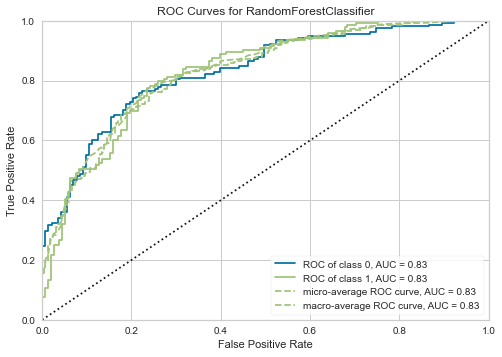

In [66]:
plot_model(tuned_rf, plot = 'auc')

### 3.2 Precision Recall Curve

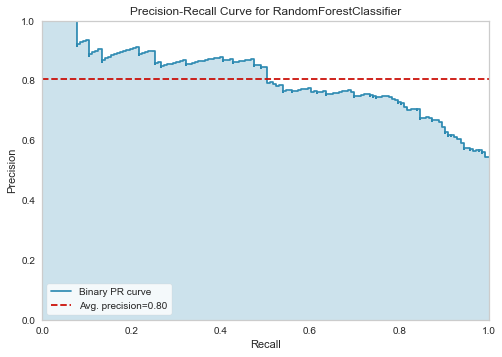

In [67]:
plot_model(tuned_rf, plot = 'pr')

### 3.3 Confusion Matrix

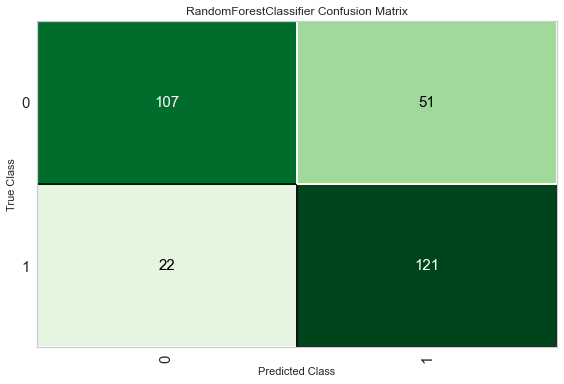

In [68]:
plot_model(tuned_rf, plot = 'confusion_matrix')

###  3.4 SHAP values

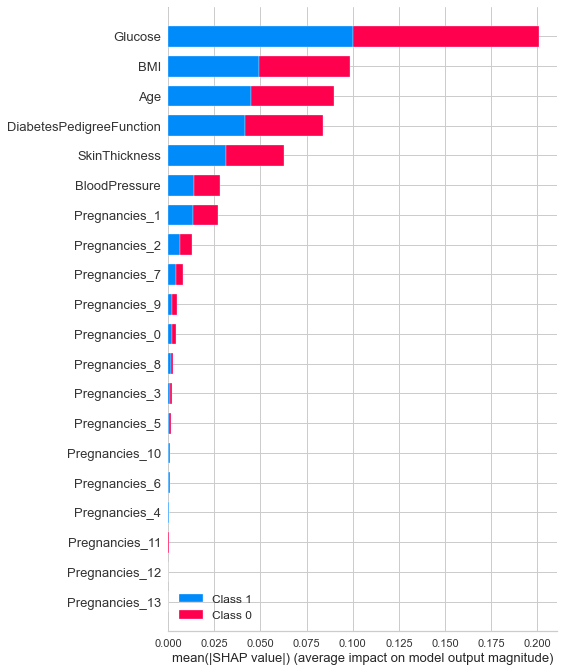

In [69]:
interpret_model(tuned_rf)

### 3.5 Visualize the model in all the possible ways
By clicking on any of the items below to view specific chart

In [70]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 4. Predict Model

In [71]:
pred_holdout = predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7575,0.8312,0.8462,0.7035,0.7683,0.5184,0.5281


In [72]:
pred_holdout.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_10,Pregnancies_11,...,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Outcome,Label,Score
0,130.000000,60.000000,23.000000,28.600000,0.692000,21.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7281
1,144.718399,80.563194,42.057667,38.068958,0.613628,39.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.7641
2,91.000000,68.000000,32.000000,39.900002,0.381000,25.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6789
3,81.000000,86.000000,16.000000,27.500000,0.306000,22.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8433
4,139.000000,54.000000,29.153419,25.600000,0.402000,22.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6447


## 5. Results & Conclusion:
With Random Forest Classifier giving a reasonable accuracy of close to 76.41%, this approach and the ML model look promising in assisting healthcare professionals to provide a prediction.

Moreover, before finalizing a health situation diagnosis based on ML models, it is essential to place a greater focus on interpreting the confusion matrix as False positives – False negatives can be risky.


# Data Reporting:
Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

- Pie chart to describe the diabetic or non-diabetic population
- Scatter charts between relevant variables to analyze the relationships
- Histogram or frequency charts to analyze the distribution of the data
- Heatmap of correlation analysis among the relevant variables
- Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.



#### 1.1. Convert DataFrame to excel file for use in Tableau

In [ ]:
df.to_excel('TableauHealth.xlsx')

#### 1.2 Create dashbord as instucted above